# ÇAĞLA ŞENEL

# ARMUT MACHINE LEARNING - CASE STUDY 

### 1.WORD CLASSIFICATION

#### 1.1 Classification of the words, namely Turkish and English
- Import libraries
- Import csv files 
- Handle null values, upper cases and spaces between letters
- Feature Extraction on words using CountVectorizer
- Get results on unbalanced data and evaluate the results
- Apply Resamling Methods
- Get results on balanced data, evaluate and compare  the results
- Select best algorithm
- Tune Hyperparameters 
- Add new feature 
- Get final results and evaluate 

#### Import the libraries

In [328]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt



#### Import the data

In [3]:
data_eng=pd.read_csv('Armut_ML_Case_-_Eng.csv')
data_tr=pd.read_csv('Armut_ML_Case_-_Turkish.csv')

#### Assigning labels to the dataset

In [4]:
data_eng['is_tr']=0
data_tr['is_tr']=1

In [5]:
data_eng.head()

,Words,is_tr
0,flying,0
1,fillet,0
2,fiance,0
3,failed,0
4,fanons,0


In [6]:
data_tr.head()

,Kelimeler,is_tr
0,frak,1
1,fasit,1
2,fecir,1
3,font,1
4,flut,1


#### Check if there are any null values, then drop 

In [7]:
data_eng.isnull().sum()

Words    1
is_tr    0
dtype: int64

In [8]:
data_tr.isnull().sum()

Kelimeler    0
is_tr        0
dtype: int64

In [9]:
data_eng = data_eng.dropna()

#### The column names are changed to be the same for both data sets.Then data sets are merged 

In [10]:
data_tr.columns=['Words','is_tr']
data_all= pd.concat([data_eng,data_tr], axis=0, ignore_index=True)

#### Upper cases are replaced with lower case and  spaces between the letters are replaced with ''.

In [11]:
data_all.Words=data_all.Words.str.lower()
data_all.Words=data_all.Words.str.replace(' ', '')

In [12]:
data_all.head()

,Words,is_tr
0,flying,0
1,fillet,0
2,fiance,0
3,failed,0
4,fanons,0


#### The graph below shows that dataset is higly unbalanced so i need use a method such as RESAMPLING on trainset to make it balanced. But first, i  want to to see the results of unbalanced data to able to compare with  balanced data.


In [13]:
target_cnt = data_all.groupby('is_tr').count()

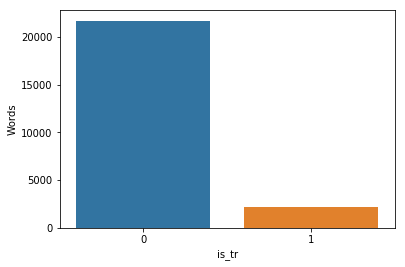

In [14]:
sns.barplot(x=target_cnt.index,y=target_cnt.Words)

In [15]:

def split_data(data_all):
    """
    Function for split all dataset to train and test set.Returns train and test set and their target values.
    """
    data=data_all.drop('is_tr', axis=1)
    target=data_all['is_tr']
    return train_test_split(data, target, test_size=0.33, random_state=42)
        #X_train, X_test, y_train, y_test 
     


In [16]:
def to_array(train, test):
    """
    converts the params to array to give as input to the object of CountVectorizer.
    """
    X_train = [word['Words'] for index,word in train.iterrows()]
    X_test = [word['Words'] for index,word in test.iterrows()]
    return X_train, X_test

In [329]:


def get_prediction(X_train,y_train, X_test, est): 
    """
    
    param__est:  the algorithm you chose to train and get an prediction
    CountVectorizer converts text to vectors for Machine Learning
    "get_prediction" function gives you an estimation on test_set after training processing 
    """
    vectorizer = CountVectorizer(analyzer='char')  
    train = vectorizer.fit_transform(X_train)
    classifier = est
    target = y_train
    classifier = classifier.fit(train, target)
    test = vectorizer.transform(X_test)
    pred = classifier.predict(test)
    return pred


In [214]:
def get_model_results(X_train,y_train, X_test, y_test, est):
    """
    the function is nested. It calls "get_prediction" func inside to get an prediction , and then returns success metrics comparing actual and prediction.
    """
    pred =get_prediction(X_train,y_train, X_test,est)
    labels  = data_all['is_tr'].unique()
    acc = accuracy_score(y_test, pred, normalize=True)
    print(str(est)+' Model Accuracy:%.2f'%acc)
    print ('\n classification report :\n')
    print(classification_report(y_test, pred))
    print('f1_score:'+str(f1_score(y_test, pred)))
    print('\n precision:'+str(precision_score(y_test, pred)))
    print('\n recall:'+str(recall_score(y_test, pred)))
    print ('\n confussion matrix:\n',confusion_matrix(y_test, pred))
    
    

#### results below is taken on unbalanced data. Accuracy:0.91 is not important cause recall is so low. Model tends to predict that label is 1 as 0 because of its being unbalanced.We can also see that from FN value(705 among 741) and TN value on confusion matrix. So we obtained high Accuracy but it is not acceptible.Resampling method on trainset is needed.   



In [215]:
estimator=XGBClassifier()
X_train, X_test, y_train, y_test = split_data(data_all)
X_train, X_test = to_array(X_train, X_test)
get_model_results(X_train,y_train, X_test, y_test,estimator)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1) Model Accuracy:0.91

 classification report :

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7146
           1       0.78      0.05      0.09       741

    accuracy                           0.91      7887
   macro avg       0.85      0.52      0.52      7887
weighted avg       0.90      0.91      0.87      7887

f1_score:0.0914866581956798

 precision:0.782608695652174

 recall:0.048582995951417005

 confussion matrix:
 [[7136   10]
 [ 705   36]]


# k=5 CROSS-VALIDATION

By dividing the dataset k times, the results are obtained in different train and test sets.
This method is important to understand the stability of the metric results, that is, whether the good or bad result was received by chance.
avarage of results of k=5 cross-validation is close to above result.

In [219]:
X_all=[word['Words'] for index,word in (data_all.drop('is_tr', axis=1)).iterrows()]
y_all=data_all['is_tr']
pipeline = Pipeline([('cntvector', CountVectorizer(analyzer='char')),('clf', XGBClassifier())])
#print(str(cross_val_score(pipeline, X_all, y_all, cv=5, scoring='f1')))
print(np.mean(cross_val_score(pipeline, X_all, y_all, cv=5, scoring='f1')))

0.10474999476464349


# MAKE TRAINSET BALANCED USING UNDERSAMPLING OR OVERSAMPLING METHOD

#### UNDERSAMPLING PROCESSING

In [276]:
X_train, X_test, y_train, y_test = split_data(data_all)


In [279]:
train=pd.concat([X_train,y_train], axis=1)

In [282]:
cnt_0, cnt_1 = train.is_tr.value_counts()
print('cnt0 :'+str(cnt_0)+ '     cnt1: '+str(cnt_1))
df_class_0 = train[train['is_tr'] == 0]
df_class_1 = train[train['is_tr'] == 1]

cnt0 :14519     cnt1: 1494


#### randomly selecting observations from the majority class 0 as much as minority class 1 on  from the training dataset.

In [283]:

df_class_0_under= df_class_0.sample(cnt_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0, ignore_index=True)
X_train=df_under.drop('is_tr',axis=1)
y_train=df_under['is_tr']


In [182]:
y_train =y_train.astype(int)
y_train.value_counts()


1    1494
0    1494
Name: is_tr, dtype: int64

## RESULTS AFTER UNDERSAMPLING METHOD

 Oversampling and unsersampling results are  so close each other.I will continoue with trainset applied oversamplig. You can see that in the code blocks below.As a result, after resampling, TN value decreased, FP value increased. at least we lowered the model's tendency to predict 0 because of the unbalacity of the data. We need high precision and recall, but in the model,  precision is lower than recall. I mean, while recall(the correct estimation rate of Turkish words) is 0.646, precision (How many of words we predict Turkish are really Turkish) is 0.189.
 F-score helps measure precision and recall at the same time. It uses harmonic averages rather than arithmetic averages, punishing excessive values more.It seems that F1 score is increased after resampling but still low.

In [284]:
X_train, X_test = to_array(X_train, X_test)
get_model_results(X_train,y_train, X_test, y_test, XGBClassifier())




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1) Model Accuracy:0.71

 classification report :

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      7146
           1       0.19      0.65      0.29       741

    accuracy                           0.71      7887
   macro avg       0.57      0.68      0.55      7887
weighted avg       0.88      0.71      0.77      7887

f1_score:0.2926084300549786

 precision:0.18910382945124357

 recall:0.6464237516869096

 confussion matrix:
 [[5092 2054]
 [ 262  479]]


#### OVERSAMPLING METHOD

In [185]:
####OVERSAMPLING
df_class_1_over = df_class_1.sample(cnt_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)


## RESULTS AFTER OVERSAMPLING METHOD

In [332]:
X_train=df_over.drop('is_tr',axis=1)
y_train=df_over['is_tr']
X_train = [word['Words'] for index,word in X_train.iterrows()]
get_model_results(X_train,y_train, X_test, y_test, XGBClassifier())





XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1) Model Accuracy:0.72

 classification report :

              precision    recall  f1-score   support

           0       0.95      0.73      0.83      7146
           1       0.20      0.65      0.31       741

    accuracy                           0.72      7887
   macro avg       0.58      0.69      0.57      7887
weighted avg       0.88      0.72      0.78      7887

f1_score:0.30828025477707005

 precision:0.20175072947061276

 recall:0.6531713900134952

 confussion matrix:
 [[5231 1915]
 [ 257  484]]


### BEST ALGORİTHM SELECTION
I compared results of some algorithms such as XGBoost, RandomForest, NaiveBayes, SupportVector.The metrics I consider for algorithm selection are the F1 score that helps measure precision and recall at the same time and is used for extreme values, and the AUC-Roc curve means the larger the Area Under the Curve, the better the machine learning models are to distinguish between given classes.
XGBoost has AUC 0.755 and 0.31 F1-Score,  is the  best among other classifiers.


In [189]:
algorithms=[XGBClassifier(),RandomForestClassifier(), MultinomialNB(),SVC()]
for estimator in algorithms:
    get_model_results(X_train,y_train, X_test, y_test,estimator)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1) Model Accuracy:0.72

 classification report :

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7146
           1       0.20      0.67      0.31       741

    accuracy                           0.72      7887
   macro avg       0.58      0.70      0.57      7887
weighted avg       0.88      0.72      0.78      7887

f1_score:0.30956088445966984

 precision:0.20121457489878541

 recall:0.6707152496626181


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) Model Accuracy:0.87

 classification report :

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7146
           1       0.26      0.19      0.22       741

    accuracy                           0.87      7887
   macro avg       0.59      0.57      0.58      7887
weighted avg       0.86      0.87      0.86      7887

f1_score:0.221011673151751

 precision:0.2610294117647059

 recall:0.19163292847503374
MultinomialNB(alpha=1.0, class_prior=None, fit_pr

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) Model Accuracy:0.71

 classification report :

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      7146
           1       0.19      0.63      0.29       741

    accuracy                           0.71      7887
   macro avg       0.57      0.67      0.55      7887
weighted avg       0.88      0.71      0.77      7887

f1_score:0.28729621654875426

 precision:0.18605577689243027

 recall:0.6302294197031039


In [327]:


def get_roccurve_metrics(X_train,y_train, X_test, est): 
    vectorizer = CountVectorizer(analyzer='char')  
    train = vectorizer.fit_transform(X_train)
    classifier = est
    target = y_train
    classifier = classifier.fit(train, target)
    test = vectorizer.transform(X_test)
    probs = classifier.predict_proba(test)
    pred = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, roc_auc


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


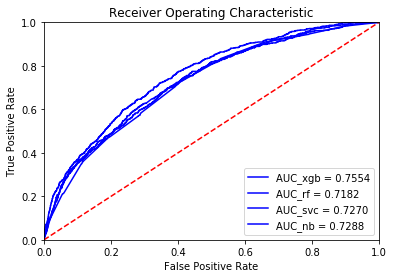

In [325]:

fpr_xgb, tpr_xgb,roc_auc_xgb= get_roccurve_metrics(X_train,y_train, X_test, XGBClassifier())
fpr_rf, tpr_rf,roc_auc_rf= get_roccurve_metrics(X_train,y_train, X_test, RandomForestClassifier())
fpr_svc, tpr_svc,roc_auc_svc= get_roccurve_metrics(X_train,y_train, X_test, SVC(probability=True))
fpr_nb, tpr_nb,roc_auc_nb= get_roccurve_metrics(X_train,y_train, X_test, MultinomialNB())




plt.title('Receiver Operating Characteristic')
plt.plot(fpr_xgb, tpr_xgb, 'b', label = 'AUC_xgb = %0.4f' % roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC_rf = %0.4f' % roc_auc_rf)
plt.plot(fpr_svc, tpr_svc, 'b', label = 'AUC_svc = %0.4f' % roc_auc_svc)
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC_nb = %0.4f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



### TUNING HYPER PARAMETERS USING GRIDSEARCH
Best parameter set is chosen for XGBoost. You can see the parameters and its results below.It is clear that these parameters increase the performance of the evaluation metrics(accuracy, f1-score, precision, recall). 

In [373]:
pipeline = Pipeline([('cntvector', CountVectorizer(analyzer='char')),('clf', XGBClassifier())])
pipeline.fit(X_train,y_train)

parameters = {'clf__estimator__min_child_weight': [1, 5, 10],'clf__estimator__gamma': [0.5, 1, 1.5, 2, 5],'clf__estimator__subsample': [0.6, 0.8, 1.0],'clf__estimator__colsample_bytree': [0.6, 0.8, 1.0],'clf__estimator__max_depth': [3, 4, 5]}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train, y_train)




Fitting 2 folds for each of 405 candidates, totalling 810 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.5min
[Parallel(n_jobs=2)]: Done 810 out of 810 | elapsed:  6.6min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cntvector',
                                        CountVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [376]:
print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)


Best parameters set:
[('cntvector', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, estimator__colsample_bytree=0.6,
              estimator__gamma=0.5, estimator__max_depth=3,
              estimator__min_child_weight=1, estimator__subsample=0.6, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos

In [336]:
pipeline = Pipeline([('cntvector', CountVectorizer(analyzer='char')), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
colsample_bytree=1, estimator__colsample_bytree=0.6,estimator__gamma=0.5, estimator__max_depth=3,
              estimator__min_child_weight=1, estimator__subsample=0.6, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1))])
pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)
print(classification_report(y_test, pred))
print('\n accuracy:'+str(accuracy_score(y_test, pred)))
print('f1_score:'+str(f1_score(y_test, pred)))
print('\n precision:'+str(precision_score(y_test, pred)))
print('\n recall:'+str(recall_score(y_test, pred)))
print('\n confusion matrix:\n'+str(confusion_matrix(y_test, pred)))



              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7146
           1       0.24      0.70      0.36       741

    accuracy                           0.77      7887
   macro avg       0.60      0.74      0.61      7887
weighted avg       0.89      0.77      0.81      7887


 accuracy:0.7673386585520476
f1_score:0.3612948137835016

 precision:0.24343339587242027

 recall:0.7004048582995951

 confusion matrix:
[[5533 1613]
 [ 222  519]]


### Adding WORD LENGHT as a new feature, maybe the result would improve

In [364]:

data_all['word_len']=data_all.Words.apply(lambda x: len(x))
count_vectorizer =CountVectorizer(analyzer='char', binary=False, decode_error='strict', encoding='utf-8',input='content', lowercase=True, max_df=0.5, max_features=None,min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,smooth_idf=True, stop_words=None, strip_accents=None,sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',tokenizer=None, use_idf=True,vocabulary=None)
sparse_matrix = count_vectorizer.fit_transform(data_all.Words)
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
data_all.reset_index(inplace=True, drop=True)
df=pd.concat([df, data_all[[ 'word_len', 'is_tr']]], axis=1)
y = df.is_tr
X =df.drop('is_tr', axis=1)



In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#for oversampling again
train=pd.concat([X_train,y_train], axis=1)
cnt_0, cnt_1 = train.is_tr.value_counts()
df_class_0 = train[train['is_tr'] == 0]
df_class_1 = train[train['is_tr'] == 1]
df_class_1_over = df_class_1.sample(cnt_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)
X_train=df_over.drop('is_tr',axis=1)
y_train=df_over['is_tr']


In [366]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, estimator__colsample_bytree=0.6,
              estimator__gamma=0.5, estimator__max_depth=3,
              estimator__min_child_weight=1, estimator__subsample=0.6, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1)

In [367]:
xgb.fit(X_train, y_train)
xgb.predict(X_test)
print(classification_report(y_test, pred))
print('\n accuracy:'+str(accuracy_score(y_test, pred)))
print('f1_score:'+str(f1_score(y_test, pred)))
print('\n precision:'+str(precision_score(y_test, pred)))
print('\n recall:'+str(recall_score(y_test, pred)))
print('\n confusion matrix:\n'+str(confusion_matrix(y_test, pred)))



              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7146
           1       0.24      0.70      0.36       741

    accuracy                           0.77      7887
   macro avg       0.60      0.74      0.61      7887
weighted avg       0.89      0.77      0.81      7887


 accuracy:0.7673386585520476
f1_score:0.3612948137835016

 precision:0.24343339587242027

 recall:0.7004048582995951

 confusion matrix:
[[5533 1613]
 [ 222  519]]


# CONCLUSION
To summarize, I combined csv files that have English and Turkish words  and created a single data to guess whether the word is in Turkish. Target value is column 'is_tr'. Data was actually highly unbalance, so I applied the resampling method on the trainset to balance the data. Before applying this method, I also got results on unbalance data to compare the results.I used CountVectorizer to transform word to char feature vectors that can be used as input to classifier.
The results I get over unbalanced data show that accuracy is very high but this is not important, because model tends to predict that label is 1 as 0. It is clearly visible in the confusion matrix. After balancing the data on the trainset, TN value decreased, FP value increased. at least we lowered the model's tendency to predict 0 because of the unbalacity of the data. At the same time, accuracy decreased, f1 score increased.This scenario is more acceptable than unbalanced data with high accuracy.
XGBoost has higher AUC and F1-Score, is the best among other classifiers. After selecting best algorithm, best parameters was chosen for XGBoost  thanks to Gridsearch.These best parameters increased the performance of the evaluation metrics (accuracy, f1-score, precision, recall).I need high precision and recall, But model has still low precison and F1 score.
while recall(the correct estimation rate of Turkish words) is 0.70, precision (How many of words we predict Turkish are really Turkish) is 0.24
in another saying, the low precision  means that the model's classifier returns a lot of false positives (i mean, model decides to word as in turkish but actually it is  in english).I talked about before, F1-score helps measure precision and recall at the same time. It uses harmonic averages rather than arithmetic averages. F1 score is 0.36.
Finally, i added word lenght as a new feature but results have not changed.

# 1.2 Distinguish junk words from genuine words

This question, that is, distinguish junk words from genuine words is similar to the problem "did  you mean ....." in search engines used in google or e-commerce. I mean, we're quite likely to misspell a word we entered in search engines.Nevertheless, the word we are trying to write is perceived and returns a result.The most commonly used method for this situation, is text similarity, edit distance. When I think about this question(i mean, distinquesh junk word from genuine ), I can follow a way like this:
I calculate similarity score between the word I want to understand if there is a junk word, and each word in the word pool where all the words are correct.the score between 0 and 1 which refers 1 as the exact similar and 0 as the nothing similar.(In the edit distance,the lower the number of changes (distance) required, the higher the similarity score between the words.) In order to understand that the word is a junk word, I define a custom threshold (assume this value is 0.70). If there is no case that similarity score is 1 and there is  a score that is equal to or greater than the threshold value I have set, I can deduce that it is a junk word.



# 2.SIMULATION

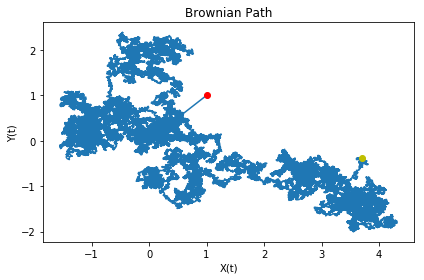

In [449]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

np.random.seed(5)
for N in range(2,100001):# Number of steps.
    
    T = 10 # Total time.
    dt = T/(N-1) # Time step size
    t = np.linspace(dt,T,N)
    
    dX = np.sqrt(dt) * np.random.randn(1,N)
    X = np.cumsum(dX, axis=1)
    X[0,0]=1 # Initial values of x.
        
    dY = np.sqrt(dt) * np.random.randn(1,N)
    Y = np.cumsum(dY, axis=1)
    Y[0,0]=1 # Initial values of y.
    if len(Y[Y==0.0])>0:
        print(N)
        break
fig, ax = plt.subplots()
ax.plot(X[0,:], Y[0,:])
ax.plot(X[0,0], Y[0,0], 'ro')
ax.plot(X[0,-1], Y[0,-1], 'yo')
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_title('Brownian Path')
plt.tight_layout()
plt.show()


In [450]:
my_list = map(lambda x: x[0], Y.T)
y_list = pd.Series(my_list)

In [451]:
y_list[y_list==0]

Series([], dtype: float64)

In [452]:
my_list = map(lambda x: x[0], X.T)
x_list = pd.Series(my_list)

In [455]:
x_list[9999]

-1.2509251081324138

#### CONCLUSION
First of all, the brownian motion is completely irregular,a random move, is a stochastic process. You can see the simulation graph above.
I constantly increased the N step parameter but i couldnt find any point that  y = 0 status in the simulations.So, suppose that, y equals 0 in the feture and now i wanna know value of x while y=0, i mean probability of x<0. Just remindin, brownian motion increment is normally distributed with mean, expected value of 0, variance of time interval.In this case, initial value is 1 not 0, i mean W0 value is not 0.
And also i said before, i couldnt find any point that  y = 0 status in the simulations.So,
Suppose that:
- Wx= brownian motion value of x on the last state. (we can think that value in the last index of x_list obtained from simulation above. I mean -1.2509)
- tf= future time while y=0 
What I need to know in order to deduce on future brownian motion of x is its expected value. And according to Brownian motion property, expected_value of where i am going to be in the future, is where i am now. I mean, expected_value(mean) of x on time tf will be -1.2509. Namely, at time tf, the brwnian motion of x can end up on any of the data points obtained by adding and subtracting the variance(time interval) to the expected value. What I'm trying to explain is that the increment is normally distributed. In the future, case that while y = 0, the fact that x is less than 0 is highly related to the B.Motion value of x in the last position (as expected value) and the t+ts (t/N) value (as variance).

In addition, you can see the skewness value of X brownian motions below. As a result, the skewness value is  Highly right  skewed but we know that
**brownian motion increment is normally distributed**.


In [481]:
x=pd.DataFrame(data=x_list)
y=pd.DataFrame(data=y_list)
df=pd.concat([x, y], axis=1)
df.columns=['x_val','y_val']
df=df[df.index<=10000]

In [482]:
x = df['x_val']
if stats.skew(x)>1:
    print(i+' skewness is: '+ str(stats.skew(x))+'; Highly skewed(Right)') 
elif stats.skew(x) <-1:
    print(i+ ' skewness is: '+ str(stats.skew(x))+'; Highly skewed(Left)')
elif (stats.skew(x)<0.5 and stats.skew(x)>-0.5):
    print(i+ ' skewness is: '+ str(stats.skew(x))+'; Symmetric')
elif (stats.skew(x)<1 and stats.stats.skew(x)>0.5) or (stats.skew(x)<-0.5 and stats.skew(x)>-1):
    print(i+ ' skewness is: '+ str(stats.skew(x))+'; Moderately skewed')  


y_val skewness is: 1.192873019079344; Highly skewed(Right)
